In [35]:
import string
import nltk
import matplotlib
%matplotlib inline
from nltk.corpus import PlaintextCorpusReader
from nltk import FreqDist
## constants
lemmatizer  = nltk.WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            return token
        
def normalize_wordlist(wordlist):
    normalized_wordlist = [normalize(w) for w in wordlist]
    # discard punctuation
    return [tok for tok in normalized_wordlist if tok is not None]

In [2]:
corpus_root = '.'
wordlists = PlaintextCorpusReader("./TEXT/", '.*.txt')

In [52]:
ca_corpus_text = dict()
for w in wordlists.fileids():
    ca_corpus_text[str(w)[:-4]] = nltk.Text(normalize_wordlist(wordlists.words(w)))
    

In [53]:
for k,v in ca_corpus_text.items():
    print(k)
    print(v.concordance("freedom"))
    print("\n")

CA_Athabasca
Displaying 13 of 13 matches:
                                    freedom 11 1 general although statement occ
 exercise legal right 11 2 academic freedom common good society depends upon se
 knowledge free exposition academic freedom university essential purpose teachi
rty agree infringe abridge academic freedom member academic community member un
tled regardless prescribed doctrine freedom carrying research publishing result
 research publishing result thereof freedom teaching discussion freedom critici
thereof freedom teaching discussion freedom criticize athabasca university asso
ze athabasca university association freedom institutional censorship academic f
m institutional censorship academic freedom doe require neutrality part individ
ity part individual rather academic freedom make commitment possible academic f
m make commitment possible academic freedom carry duty use freedom manner consi
ble academic freedom carry duty use freedom manner consistent scholarly obliga

CA_Athabasca


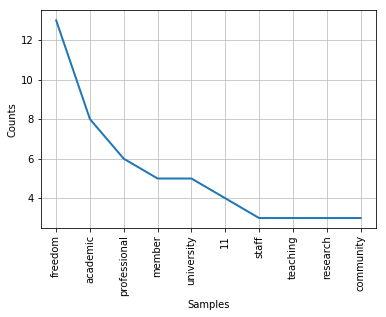

CA_Atlantic_School_Theology


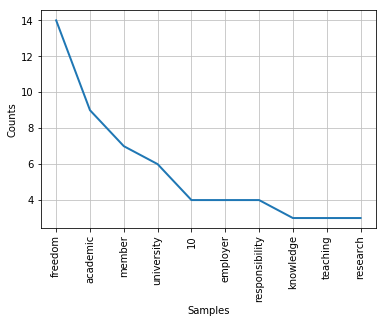

CA_Brandon


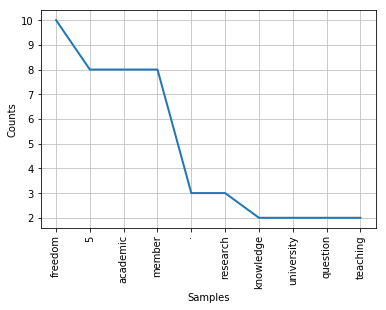

CA_Brescia


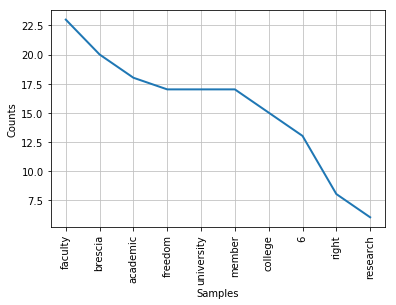

CA_Brock


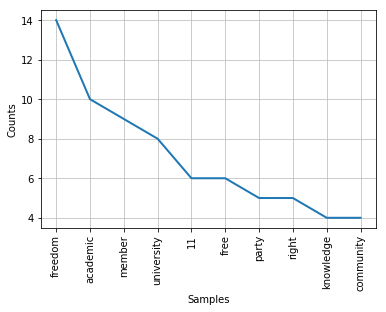

CA_Concordia


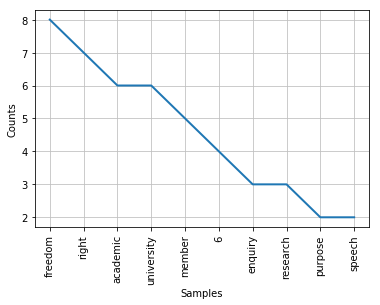

CA_Dalhousie


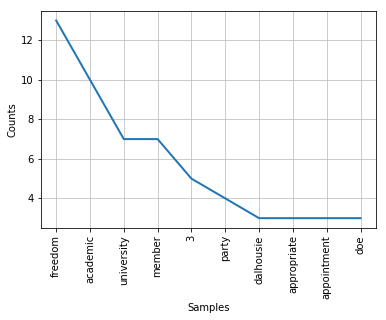

CA_Emily_Carr


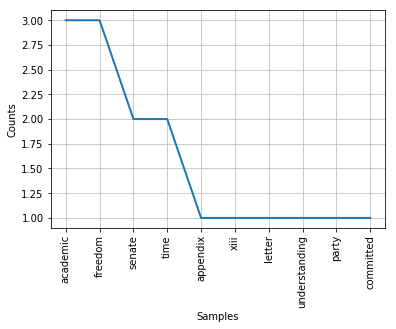

CA_Grant_MacEwan


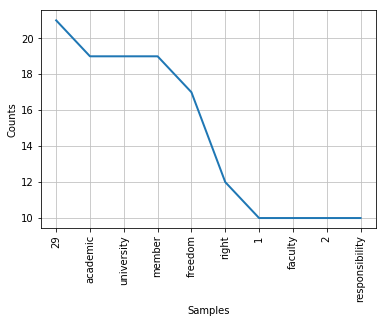

CA_Keyano


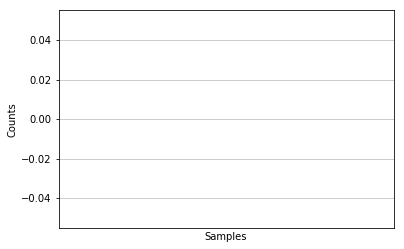

CA_Laurentian


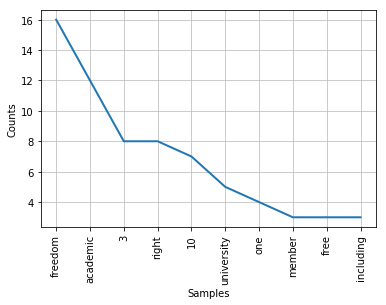

CA_McGill


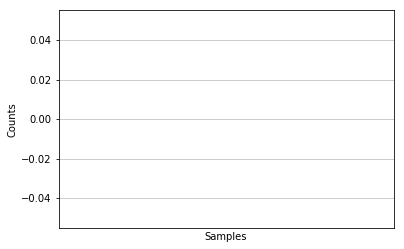

CA_McMaster


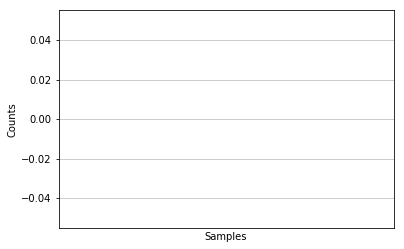

CA_Mount_Allison


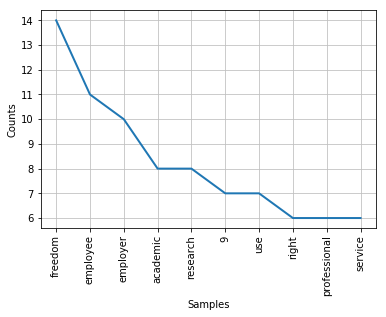

CA_Mount_Royal


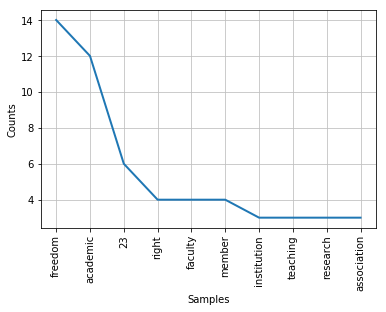

CA_Mount_Saint_Vincent


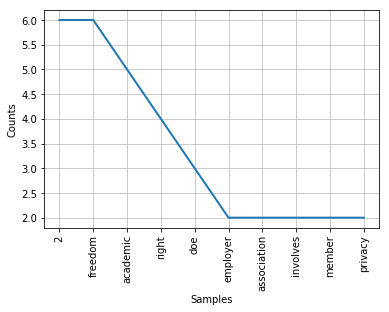

CA_Okanagan


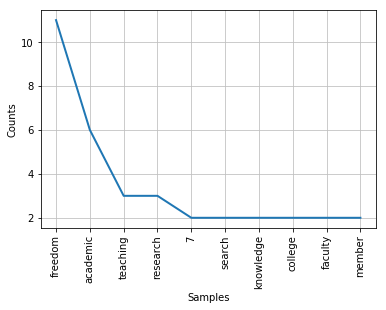

CA_Portage


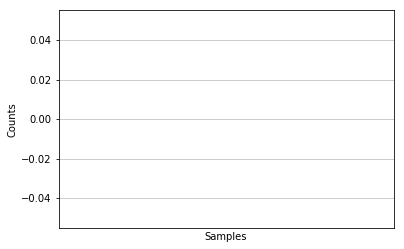

CA_Queens


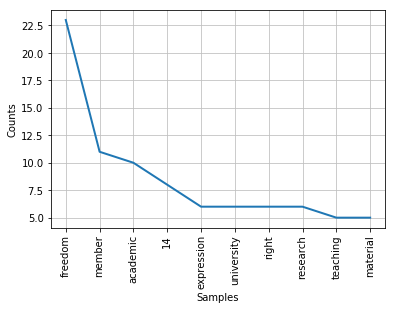

CA_Ryerson


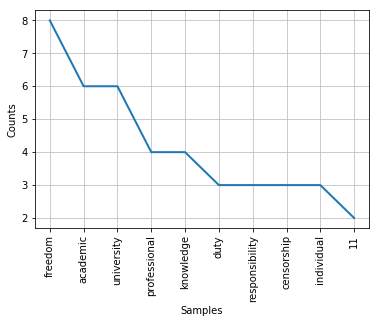

CA_Saint_Mary


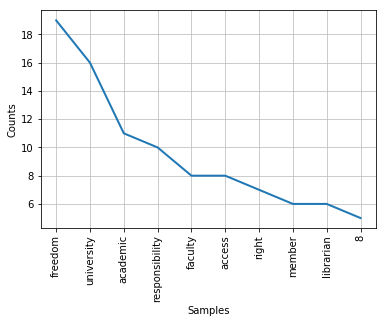

CA_Simon_Fraser


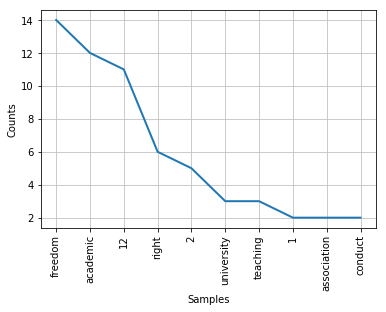

CA_Southern_Alberta_Institute of Technology


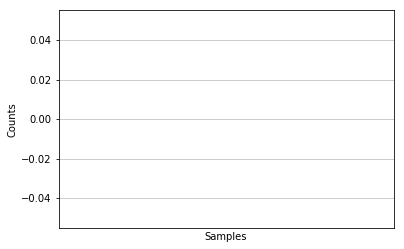

CA_Trent


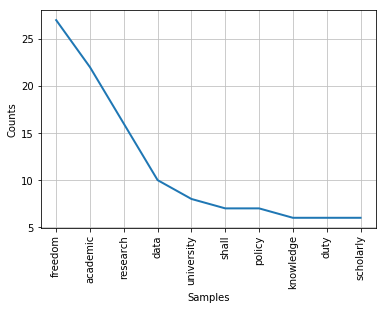

CA_U_Alberta


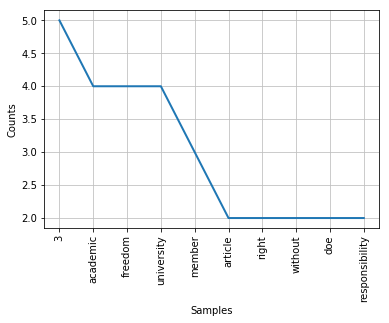

CA_U_BC


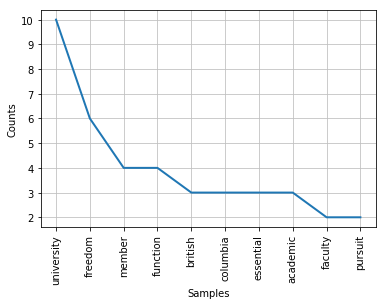

CA_U_Calgary


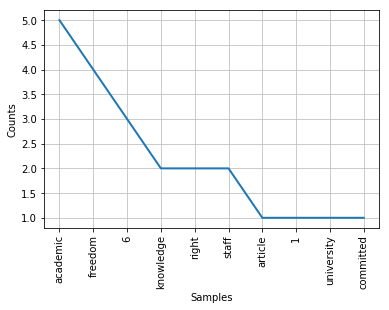

CA_U_Guelph


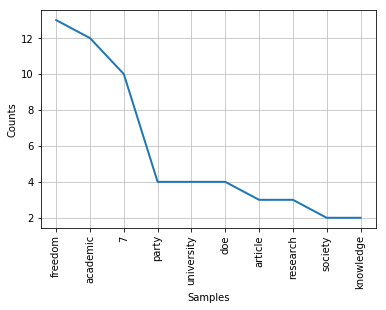

CA_U_Lethbridge


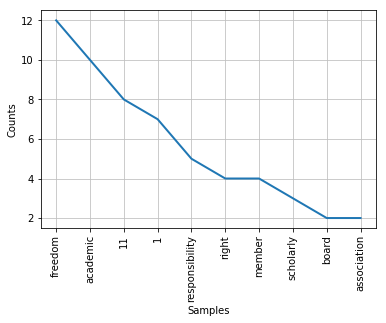

CA_U_Manitoba


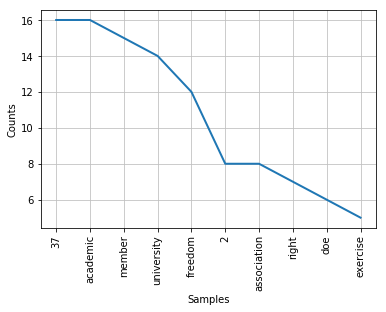

CA_U_New_Brunswick


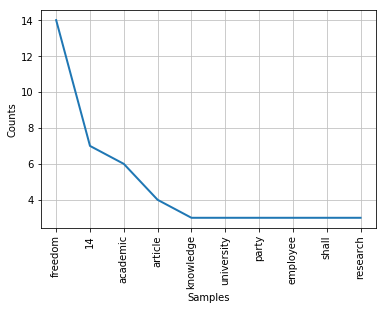

CA_U_Ottawa


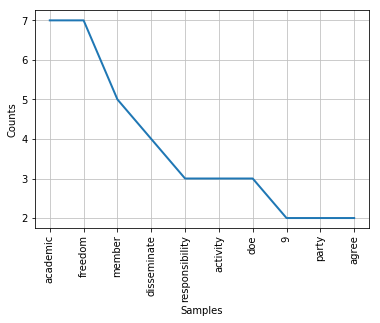

CA_U_Regina


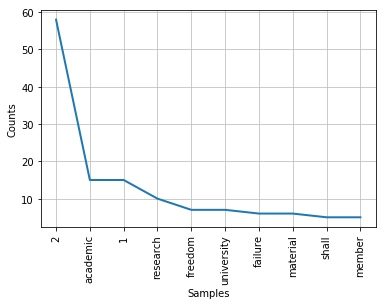

CA_U_Saskatchewan


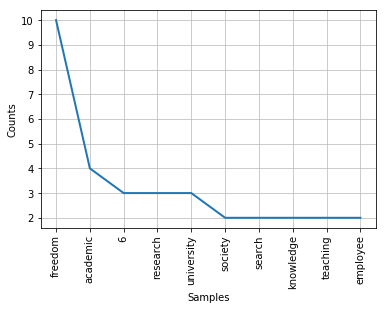

CA_U_Toronto


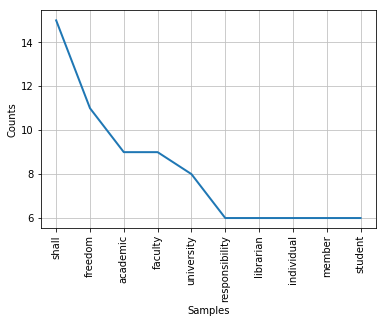

CA_U_Waterloo


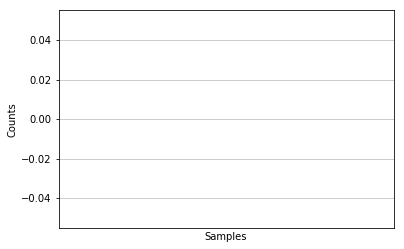

CA_U_Windsor


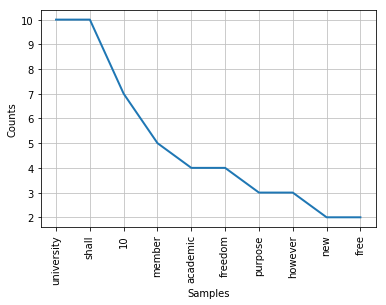

CA_U_Winnipeg


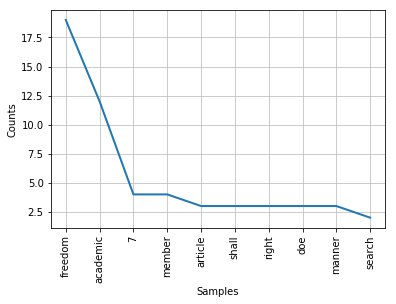

CA_Victoria_U


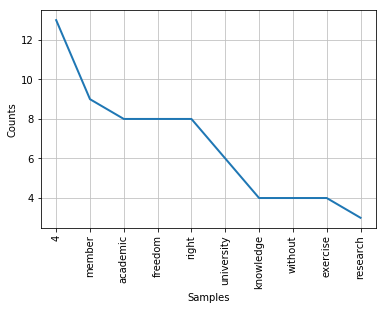

CA_Western


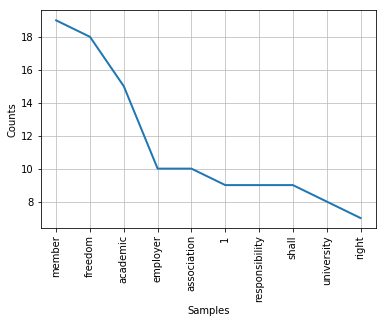

CA_Wilfred_Laurier_U


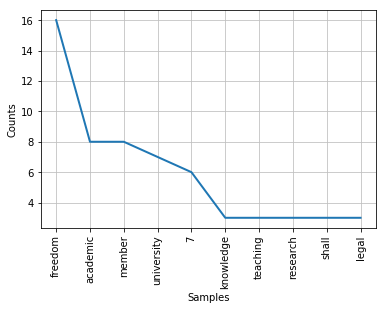

In [57]:
ca_corpus_freq = dict()
for k,v in ca_corpus_text.items():
    print(k)
    ca_corpus_freq[k] = FreqDist(v)
    v.plot(10)

<Container object of 41 artists>

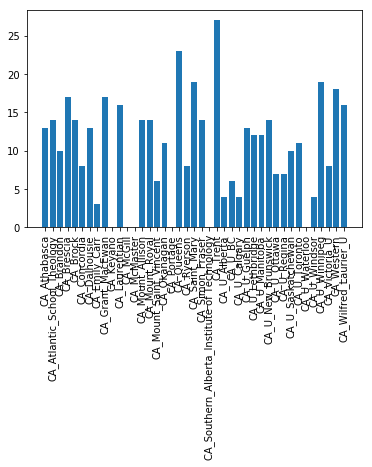

In [94]:
histo_labels = []
histo_data = []
for k,v in ca_corpus_freq.items():
    try:
        histo_labels.append(k)
        histo_data.append(v['freedom'])
        #v['freedom']
    except:
        pass

matplotlib.pyplot.xticks(rotation=90)
matplotlib.pyplot.bar(histo_labels, histo_data)